In [ ]:
# Exploring the dataset

In [300]:
from os import path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [327]:
df = (
pd.read_csv("https://raw.githubusercontent.com/data301-2020-winter1/course-project-solo_200/main/data/raw/FastFoodRestaurants.csv?token=ARAL4ZNEP46YNJJAVWW7T2C7X26OI")
    
    .dropna()
    .rename(columns = {'province':'state'})
    .drop(['address',
           'keys',
           'websites'],
         axis = 1)
)
df

,city,country,latitude,longitude,name,postalCode,state
0,Massena,US,44.921300,-74.890210,McDonald's,13662,NY
1,Washington Court House,US,39.532550,-83.445260,Wendy's,43160,OH
2,Maysville,US,38.627360,-83.791410,Frisch's Big Boy,41056,KY
3,Massena,US,44.950080,-74.845530,McDonald's,13662,NY
4,Athens,US,39.351550,-82.097280,OMG! Rotisserie,45701,OH
...,...,...,...,...,...,...,...
9995,Augusta,US,33.415257,-82.024531,Wendy's,30906,GA
9996,Cary,US,42.217300,-88.255800,Lee's Oriental Martial Arts,60013,IL
9997,Longmont,US,40.189190,-105.101720,Five Guys,80501,CO
9998,Cathedral City,US,33.788640,-116.482150,El Pollo Loco,92234,CA


In [329]:
# latitude to integer
df['latitude'] = df ['latitude'].astype(int)
df.head()

,city,country,latitude,longitude,name,postalCode,state
0,Massena,US,44,-74.89021,McDonald's,13662,NY
1,Washington Court House,US,39,-83.44526,Wendy's,43160,OH
2,Maysville,US,38,-83.79141,Frisch's Big Boy,41056,KY
3,Massena,US,44,-74.84553,McDonald's,13662,NY
4,Athens,US,39,-82.09728,OMG! Rotisserie,45701,OH


In [330]:
#longitude to integer
df['longitude'] = df['longitude'].astype(int)
df.head()

,city,country,latitude,longitude,name,postalCode,state
0,Massena,US,44,-74,McDonald's,13662,NY
1,Washington Court House,US,39,-83,Wendy's,43160,OH
2,Maysville,US,38,-83,Frisch's Big Boy,41056,KY
3,Massena,US,44,-74,McDonald's,13662,NY
4,Athens,US,39,-82,OMG! Rotisserie,45701,OH


In [331]:
# find and remove outliers in latitude column
q_low = df['latitude'].quantile(0.01)
q_hi  = df['latitude'].quantile(0.99)

df_filtered = df[(df['latitude'] < q_hi) & (df['latitude'] > q_low)]
df_filtered

,city,country,latitude,longitude,name,postalCode,state
0,Massena,US,44,-74,McDonald's,13662,NY
1,Washington Court House,US,39,-83,Wendy's,43160,OH
2,Maysville,US,38,-83,Frisch's Big Boy,41056,KY
3,Massena,US,44,-74,McDonald's,13662,NY
4,Athens,US,39,-82,OMG! Rotisserie,45701,OH
...,...,...,...,...,...,...,...
9995,Augusta,US,33,-82,Wendy's,30906,GA
9996,Cary,US,42,-88,Lee's Oriental Martial Arts,60013,IL
9997,Longmont,US,40,-105,Five Guys,80501,CO
9998,Cathedral City,US,33,-116,El Pollo Loco,92234,CA


In [19]:
# what year did McDonalds chain grow the most?
dfx = (df
       .loc[lambda df: df['name']
            .str.contains('McDonald')]
       ['year'].value_counts()
      )
dfx

2016    850
2017    534
2015    531
2018     19
2014      9
Name: year, dtype: int64

In [20]:
# what year did the Taco Bell chani grow the most?
dfx = (df
       .loc[lambda df: df['name']
            .str.contains('Taco Bell')]
       ['year'].value_counts()
      )
dfx

2016    437
2017    298
2015    292
2018      7
2014      3
Name: year, dtype: int64

In [35]:
df['postalCode'].value_counts().nlargest(20)

78209    10
32809     9
30721     9
92647     9
30606     9
75150     9
89103     8
32765     8
95610     8
50021     8
43026     8
32810     8
31210     8
54701     8
29303     8
85323     8
92335     8
44691     7
33015     7
97402     7
Name: postalCode, dtype: int64

In [5]:
#Most common fast-food restaurants in the US
df['name'].value_counts()

McDonald's             1898
Taco Bell              1032
Burger King             833
Subway                  776
Arby's                  663
                       ... 
PepperJax Grill           1
Wienerschitzel            1
Old Mill Crab House       1
Mustard Seed              1
Sub Conscious             1
Name: name, Length: 571, dtype: int64

In [88]:
#Frequency of McDonalds in the US
df1 = df.loc[lambda df: df['name'].str.contains('McDonald')]
print(df1)

              city country        name state
25     Schenectady      US  McDonald's    NY
26        Kingston      US  McDonald's    NY
27        New York      US  McDonald's    NY
28        New York      US  McDonald's    NY
29       Uniondale      US  McDonald's    NY
...            ...     ...         ...   ...
9986        Dallas      US  McDonald's    TX
9987        Dallas      US  McDonald's    TX
9989        Dundee      US  McDonald's    MI
9991  Port Hueneme      US  McDonald's    CA
9993        Oxnard      US  McDonald's    CA

[1943 rows x 4 columns]


In [7]:
#Frequency of Taco Bell in the US
df2 = df.loc[lambda df: df['name'].str.contains('Taco Bell')]
print(df2)

               city country       name state
2      Pigeon Forge      US  Taco Bell    TN
53            Wylie      US  Taco Bell    TX
54            Tyler      US  Taco Bell    TX
127     Belle Glade      US  Taco Bell    FL
153        Claymont      US  Taco Bell    DE
...             ...     ...        ...   ...
9889  Pompano Beach      US  Taco Bell    FL
9926    Schenectady      US  Taco Bell    NY
9930          Yukon      US  Taco Bell    OK
9944         Monroe      US  Taco Bell    NY
9971      Englewood      US  Taco Bell    OH

[1037 rows x 4 columns]


Text(0.5, 0, 'Frequency')

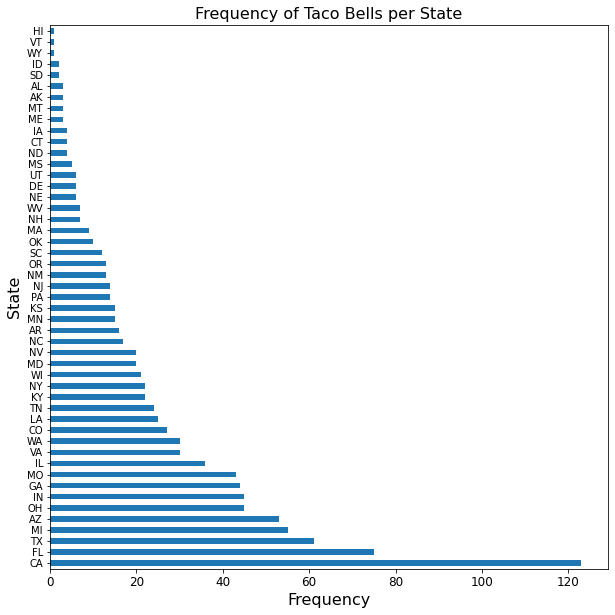

In [63]:
#What state has the most Taco Bells?
CountStatus = df2['state'].value_counts()

CountStatus.plot.barh()
plt.rcParams['figure.figsize'] = (10,10)
plt.xticks(fontsize = 12)
plt.title('Frequency of Taco Bells per State', fontsize = 16)
plt.ylabel('State', fontsize = 16)
plt.xlabel('Frequency', fontsize = 16)

Text(0.5, 0, 'Frequency')

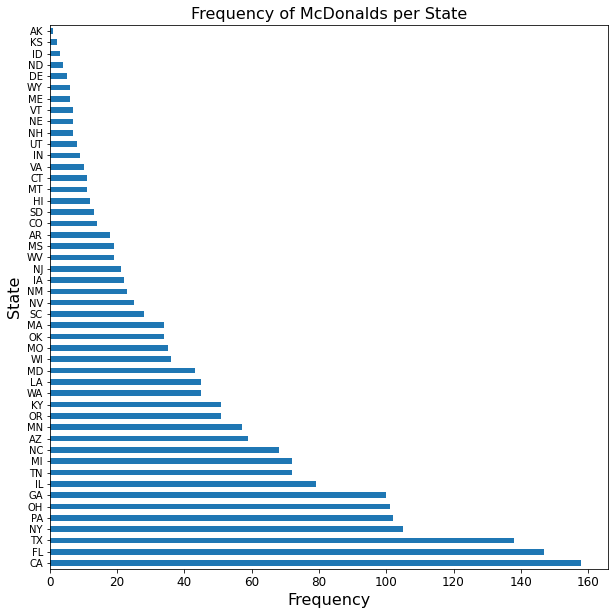

In [62]:
#What state has the most McDonalds?

CountStatus1 = df1['state'].value_counts()

CountStatus1.plot.barh()
plt.rcParams['figure.figsize'] = (10,10)
plt.xticks(fontsize = 12)
plt.title('Frequency of McDonalds per State', fontsize = 16)
plt.ylabel('State', fontsize = 16)
plt.xlabel('Frequency', fontsize = 16)

Houston       27
Las Vegas     19
Louisville    18
Orlando       18
Miami         17
Name: city, dtype: int64


(array([ 0.,  5., 10., 15., 20., 25., 30.]),
 <a list of 7 Text major ticklabel objects>)

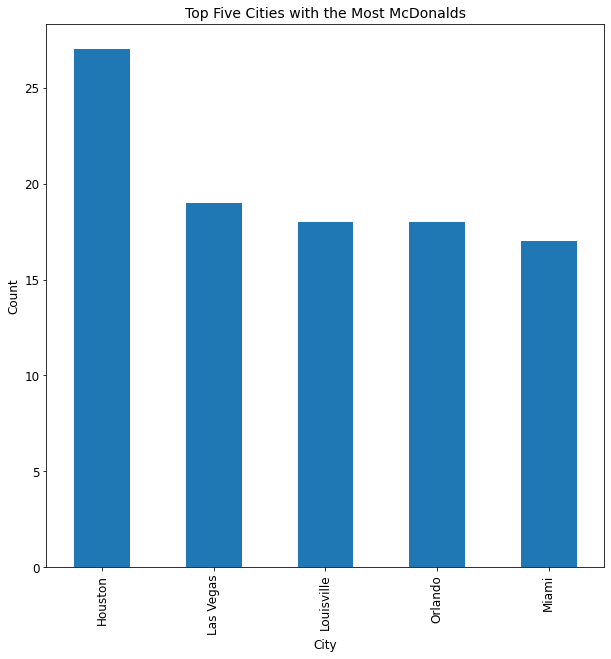

In [81]:
#Cities with McDonalds *top 5*
df5 = df1['city'].value_counts().nlargest(5)
print(df5)
df5.plot.bar()
plt.title('Top Five Cities with the Most McDonalds', fontsize = 14)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('City', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

In [92]:
#Cities with Taco Bells *top 5*
df6 = df2['city'].value_counts().nlargest(5)
print(df6)

Columbus     15
Las Vegas    11
Phoenix      11
Orlando      10
Glendale     10
Name: city, dtype: int64
